<a href="https://colab.research.google.com/github/Nayoung-young/lec-ecommerce-clone/blob/main/ch02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#_0. 분석 목적 
- 문제 상황: 

- 목적: 고객별 연간 지출액 예측 
- 방법론: Linear Regression 

#_1. 데이터 확인 


## 1.1 모듈 및 데이터 로딩 

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
df = pd.read_csv("/content/drive/MyDrive/dataset_2023/ecommerce.csv")
df_base = df.copy()

CPU times: user 6.74 ms, sys: 1.38 ms, total: 8.12 ms
Wall time: 336 ms


## 1.2 데이터 특성 확인하기 

| idx | column | desc | type | X or Y |
| --- | --- | --- | --- | - |
| 0 | Email | 이메일 | category | - | 
| 1 | Address | 주소 | category | - | 
| 2 | Avatar | 고객이 선택한 아바타 | category | - |
| 3 | Avg. Session Length | 한 번 접속해서 얼마나 접속해있는지의 평균값 | category | X |
| 4 | Time on App | 앱 접속시간 | category | X |
| 5 | Time on Website | 웹사이트 접속시간 | category | X | 
| 6 | Length of Membership | 가입 이후 시간 | category | X | 
| ------ | ------------------------------ | ------------------------------ | ------------------------------ | ------ |
| 7 | Yearly Amount Spent | 연간 지출액 | category | Y |

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df_base.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# 스케일 확인
df_base.describe() 

## max 값 - 75% 값 차이 확인 (outlier 존재 여부)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


(( 근데 각 컬럼의 단위를 알고 싶음 )) 

In [ ]:
len(df_base['Avatar'].unique().tolist())

138

In [ ]:
len(df_base['Email'].unique().tolist()) # 이메일 중복값 없음 

500

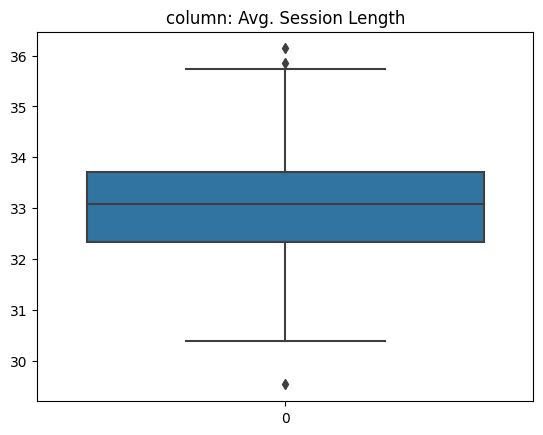

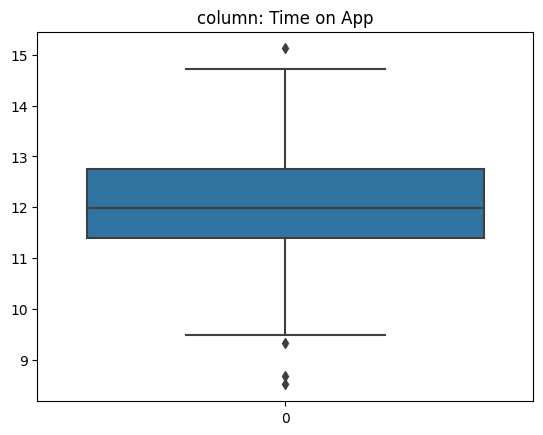

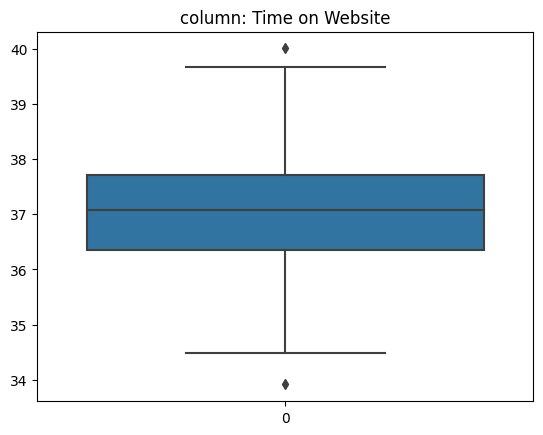

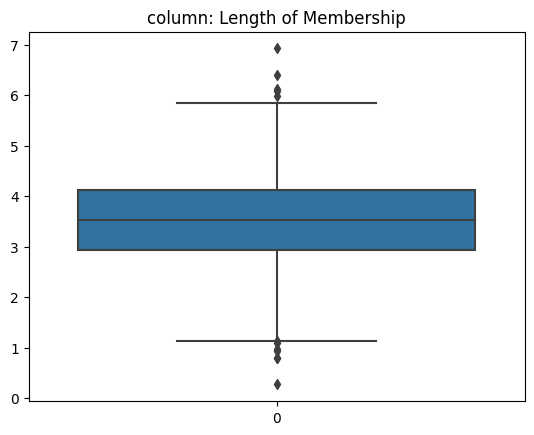

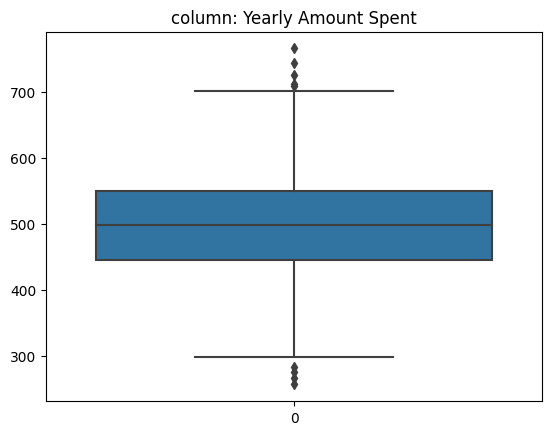

In [ ]:
vals = df_base.columns.tolist()[3:]

# ## boxplot 
# fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (1, 1))

for c in vals: 
  sns.boxplot(data = df_base[c])
  plt.title(f'column: {c}')
  plt.show()

In [ ]:
vals

['Avg. Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

## 1.3 데이터 전처리 
- 불필요한 변수 제거 

### 1.3.1 불필요한 변수 제거 

In [ ]:
# linear regression에 사용할 컬럼만 남기기 
df_01 = df_base[df_base.columns.tolist()[3:]]
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


### 1.3.2 train test set split 
- 새로운 데이터: test set 
- 모델을 만들 데이터: train set (기존의 7-80%) 


In [ ]:
from sklearn.model_selection import train_test_split
# sklearn이 트리구조로 되어있어서 from 먼저 써주기 
# 메모리의 문제 

In [ ]:
X = df_01[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df_01['Yearly Amount Spent']

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: Yearly Amount Spent
Non-Null Count  Dtype  
--------------  -----  
500 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [ ]:
%%time 
# 데이터 크기에 따라 test_size 조정 
# random_state 을 같은 숫자로 넣어서 같은 결과를 얻도록 

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

CPU times: user 1.42 ms, sys: 83 µs, total: 1.5 ms
Wall time: 1.51 ms


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 205 to 8
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   400 non-null    float64
 1   Time on App           400 non-null    float64
 2   Time on Website       400 non-null    float64
 3   Length of Membership  400 non-null    float64
dtypes: float64(4)
memory usage: 15.6 KB


# _2. 모델링 


## 2.1 Linear Regression modeling 

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train, X_train)

In [ ]:
fit = model.fit()

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                         10:48:07   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 11.906 * Avg.Session Length + 34.326 * Time on App - 14.140 * Time on Website + 61.015 * Length of Membership - 0.022

**R-squared**

- 클수록 좋음 
- Adj. 가 더욱 적절한 평가 기준 

Codf 

- 변수의 영향력 (강도와 방향) 
- ** 각 column의 스케일에 따라 달라질 수 있음 

P-value 

- *신뢰할* 수 있는 결과인가에 대한 척도 
- 0.05 이하면 양호 

R-Squared = SSR / SST 
- 평균으로부터 얼마나 개선을 시켰는가? 
- 즉, 클수록 좋음! 

# _3. 예측 및 평가 

In [ ]:
%%time 
pred = fit.predict(X_test)

CPU times: user 218 µs, sys: 50 µs, total: 268 µs
Wall time: 273 µs


In [ ]:
pred

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

In [ ]:
y_test

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
460    618.845970
152    555.892595
154    595.803819
56     520.898794
392    549.131573
Name: Yearly Amount Spent, Length: 100, dtype: float64

CPU times: user 75.5 ms, sys: 28.4 ms, total: 104 ms
Wall time: 208 ms


<Axes: xlabel='Yearly Amount Spent'>

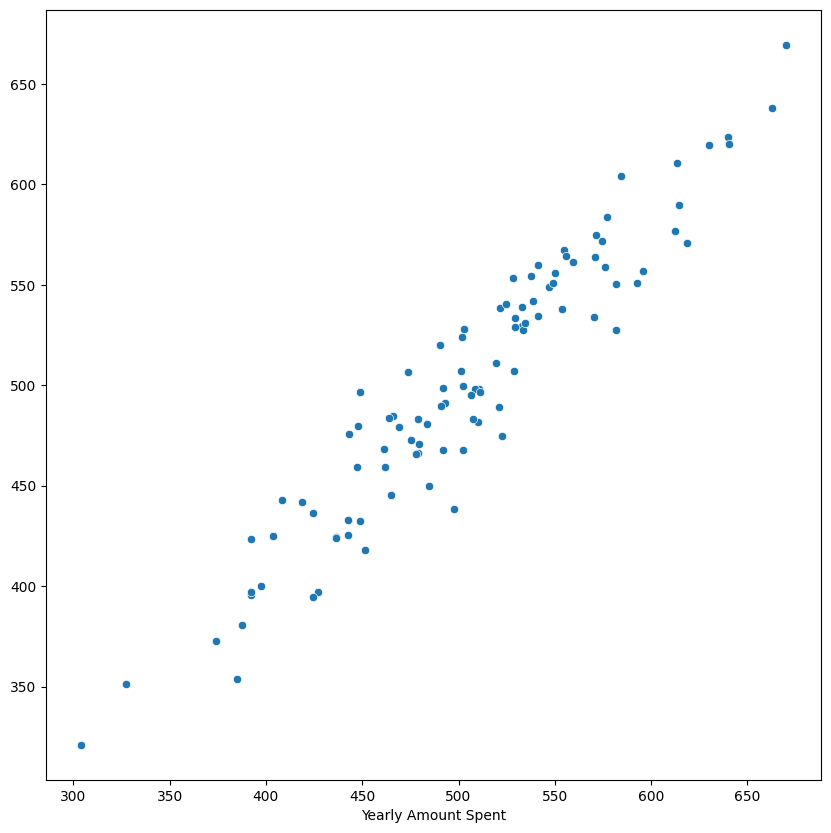

In [ ]:
%%time
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=pred)

In [ ]:
# MSE 계산하기 
from sklearn.metrics import mean_squared_error 

In [ ]:
test_mse = mean_squared_error(y_test, pred) # test MSE (상대적인 숫자)
print(test_mse)

482.28901390889644


In [ ]:
np.sqrt(test_mse) # test RMSE (상대적인 숫자)

21.961079525125726